<a href="https://www.kaggle.com/code/sahariya116/mango-leaf-ml?scriptVersionId=225613248" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_124627 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125226 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125656 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125157 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125339 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_115649 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/20211109_122151(0) (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/20211109_122241 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_130039 (Custom).jpg
/kaggle/input/mango-leafbd/MangoLeafBD Dataset/Powdery Mild

In [2]:
!ls /kaggle/input/


mango-leafbd


# To check the subdirectories inside MangoLeafBD Dataset

In [3]:
!ls /kaggle/input/mango-leafbd



'MangoLeafBD Dataset'


In [4]:
import os

# Set the dataset directory path (change if needed)
data_dir = "/kaggle/input/mango-leafbd"

# Check if the directory exists
if os.path.exists(data_dir):
    print("Dataset is available!")
    print("Contents:", os.listdir(data_dir))  # List files & folders in dataset
else:
    print("Dataset not found. Check the path.")


Dataset is available!
Contents: ['MangoLeafBD Dataset']


In [5]:
import os

data_dir = "/kaggle/input/mango-leafbd"
classes = os.listdir(data_dir)
for cls in classes:
    print(f"Class: {cls}, Number of Images: {len(os.listdir(os.path.join(data_dir, cls)))}")


Class: MangoLeafBD Dataset, Number of Images: 8


# List Subdirectories Inside MangoLeafBD Dataset

In [6]:
import os

data_dir = "/kaggle/input/mango-leafbd/MangoLeafBD Dataset"
classes = os.listdir(data_dir)
for cls in classes:
    print(f"Class: {cls}, Number of Images: {len(os.listdir(os.path.join(data_dir, cls)))}")

Class: Powdery Mildew, Number of Images: 500
Class: Cutting Weevil, Number of Images: 500
Class: Anthracnose, Number of Images: 500
Class: Bacterial Canker, Number of Images: 500
Class: Sooty Mould, Number of Images: 500
Class: Gall Midge, Number of Images: 500
Class: Healthy, Number of Images: 500
Class: Die Back, Number of Images: 500


# image size

In [7]:
from PIL import Image

image_sizes = []
for cls in classes:
    for img_file in os.listdir(os.path.join(data_dir, cls)):
        img = Image.open(os.path.join(data_dir, cls, img_file))
        image_sizes.append(img.size)

print(set(image_sizes))  # Unique image sizes

# data distribution

{(320, 239), (320, 193), (320, 86), (297, 240), (320, 214), (320, 223), (219, 320), (240, 297), (320, 232), (240, 306), (217, 320), (320, 207), (240, 290), (234, 320), (240, 299), (320, 179), (240, 308), (238, 320), (240, 317), (302, 240), (320, 200), (320, 209), (300, 240), (320, 218), (240, 283), (320, 227), (249, 240), (304, 240), (240, 246), (262, 240), (224, 320), (213, 320), (320, 92), (320, 211), (266, 240), (320, 220), (240, 285), (320, 229), (320, 238), (320, 195), (320, 213), (320, 222), (307, 240), (218, 320), (320, 197), (240, 262), (320, 206), (240, 271), (320, 160), (320, 224), (313, 240), (320, 199), (240, 273), (240, 240), (226, 320), (237, 320), (320, 217), (240, 282), (288, 240), (314, 240), (292, 240), (210, 320), (320, 210), (214, 320), (320, 219), (305, 240), (320, 240), (309, 240), (320, 212), (229, 320), (189, 320), (282, 240), (320, 205), (284, 240), (244, 240), (320, 162), (320, 226), (320, 171), (240, 245), (320, 70), (240, 263), (240, 272), (320, 228), (320, 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


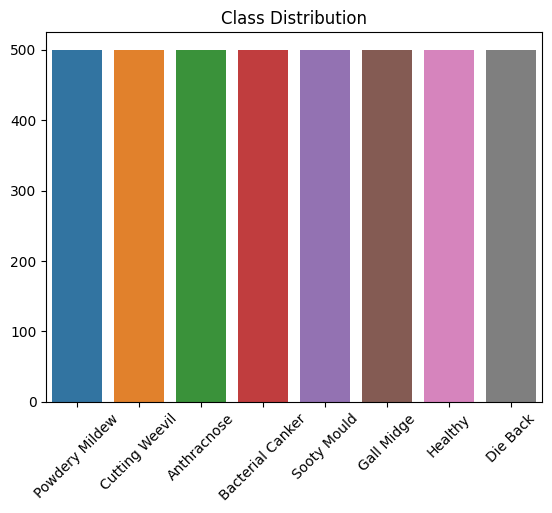

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = [len(os.listdir(os.path.join(data_dir, cls))) for cls in classes]
sns.barplot(x=classes, y=class_counts)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.show()

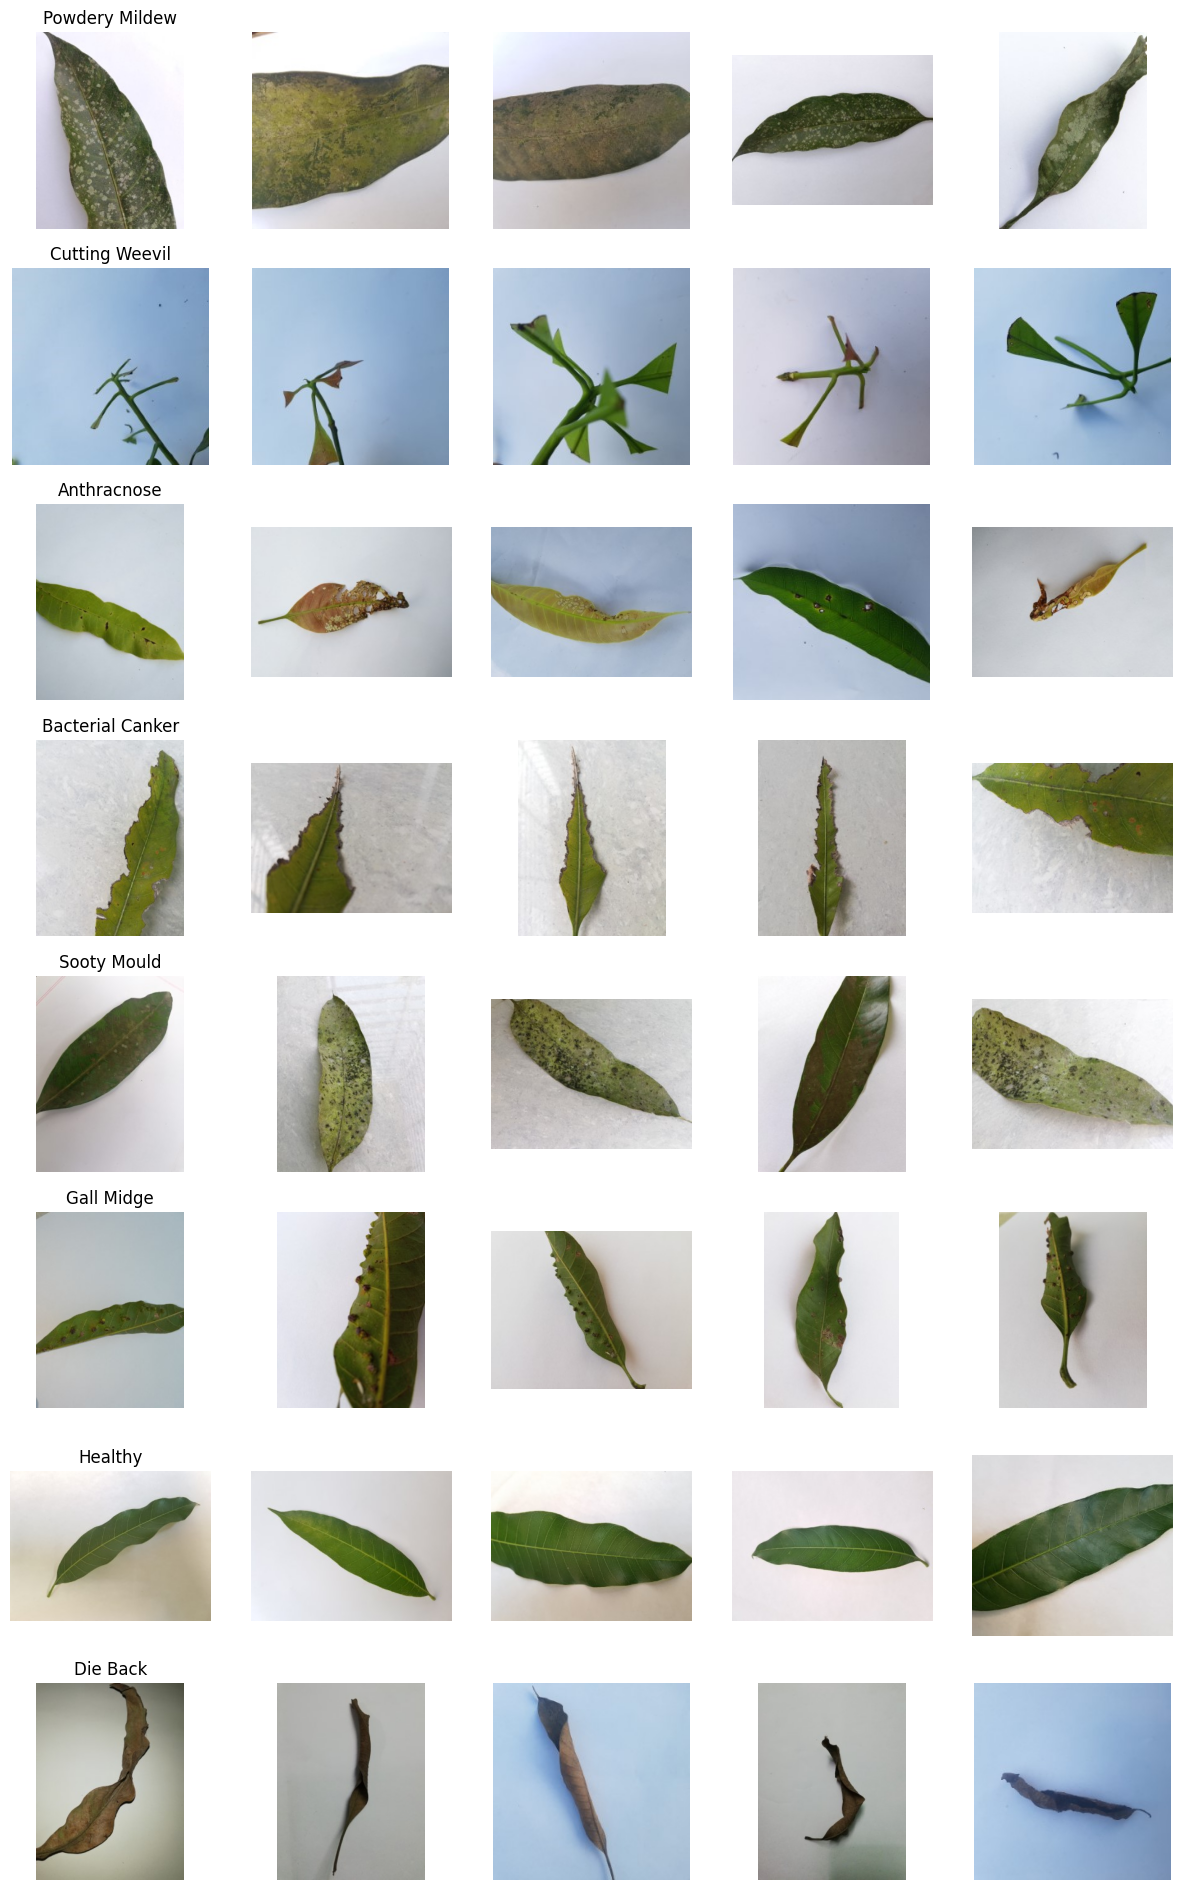

In [9]:
import random
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(classes), 5, figsize=(15, len(classes) * 3))
for i, cls in enumerate(classes):
    class_dir = os.path.join(data_dir, cls)
    for j in range(5):
        img_path = os.path.join(class_dir, random.choice(os.listdir(class_dir)))
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(cls)
plt.show()

# Data Augmentation 

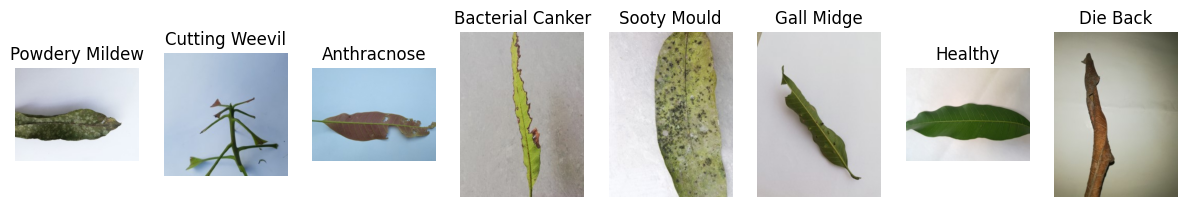

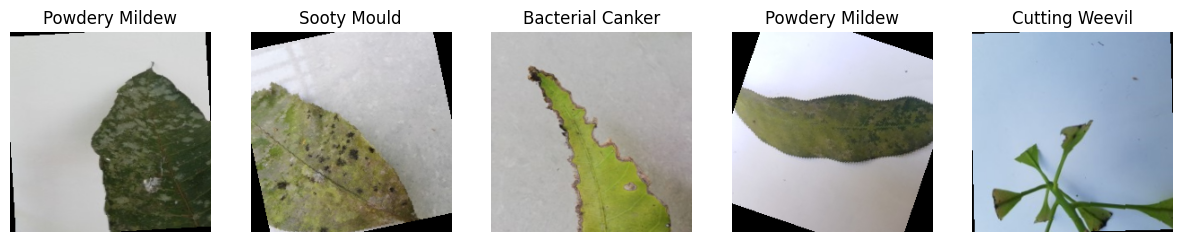

Applying custom augmentation and transformations


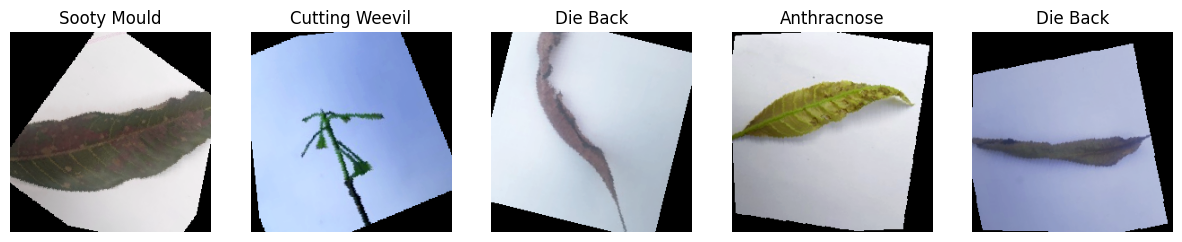

Feature Engineering Results:
Image 1: Mean = 0.1226, Std = 0.6601
Image 2: Mean = 0.3358, Std = 0.3103
Image 3: Mean = 0.3165, Std = 0.3952
Image 4: Mean = 0.2933, Std = 0.5693
Image 5: Mean = 0.2816, Std = 0.5374


In [10]:
import os
import torch
from torchvision import transforms, datasets
from PIL import Image
import matplotlib.pyplot as plt
import random

# Path to the Mango Leaf dataset
data_dir = "/kaggle/input/mango-leafbd/MangoLeafBD Dataset"  # Update this path according to your dataset location

# Visualizing a few random images from the Mango Leaf dataset
def visualize_images(data_dir):
    class_names = os.listdir(data_dir)
    fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5))

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        image_file = random.choice(os.listdir(class_dir))
        image_path = os.path.join(class_dir, image_file)

        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

visualize_images(data_dir)

# Data augmentation pipeline
transform_pipeline = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(20),  # Randomly rotate the image by 20 degrees
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image
])

# Create a dataset using ImageFolder and apply the transform pipeline
image_dataset = datasets.ImageFolder(root=data_dir, transform=transform_pipeline)
dataloader = torch.utils.data.DataLoader(image_dataset, batch_size=16, shuffle=True)

# Visualize augmented images
def visualize_augmented_images(dataloader):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(1, len(images[:5]), figsize=(15, 5))

    for i in range(5):
        img = images[i].permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
        img = img * 0.5 + 0.5  # Denormalize the image for visualization

        axes[i].imshow(img)
        axes[i].set_title(image_dataset.classes[labels[i]])
        axes[i].axis("off")

    plt.show()

visualize_augmented_images(dataloader)

# Apply more custom augmentations
print("Applying custom augmentation and transformations")
custom_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Random affine transformations
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(20),  # Random rotation of up to 20 degrees
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image
])

# Create a dataset with custom augmentations
augmented_dataset = datasets.ImageFolder(root=data_dir, transform=custom_transform)
augmented_loader = torch.utils.data.DataLoader(augmented_dataset, batch_size=16, shuffle=True)

# Visualize augmented images with custom transformations
visualize_augmented_images(augmented_loader)

# Feature engineering: Compute mean and standard deviation of images in the dataset
def compute_features(loader):
    features = []
    for images, labels in loader:
        for img in images:
            mean = img.mean().item()
            std = img.std().item()
            features.append((mean, std))
    return features

features = compute_features(dataloader)

# Print feature engineering results
print("Feature Engineering Results:")
for i, (mean, std) in enumerate(features[:5]):
    print(f"Image {i+1}: Mean = {mean:.4f}, Std = {std:.4f}")


In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from graphviz import Digraph

# an image dataset by converting image files into numerical values suitable for machine learning models.

In [12]:
import os
import cv2
import numpy as np
import pandas as pd

# Specify the directory where the images are stored
image_dir = '/kaggle/input/mango-leafbd/MangoLeafBD Dataset'  # Replace with your directory path
categories = os.listdir(image_dir)  # List of subfolder names (i.e., class labels)

# Load the images and labels
data = []    # Stores numerical representations (flattened pixel values) of images.
labels = []   # Stores the class/category each image belongs to.

for category in categories:
    category_path = os.path.join(image_dir, category)
    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Convert the image from BGR (OpenCV default) to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Resize image to 64x64 (you can change this size as needed)
        image = cv2.resize(image, (64, 64))
        
        # Flatten the image from 3D to 1D
        image = image.flatten()
        
        data.append(image)
        labels.append(category)

# Convert the list of data into a numpy array
X = np.array(data)  # Features (flattened images)
y = np.array(labels)  # Labels (class/category)

# Create a DataFrame with the image data and labels
df = pd.DataFrame(X)
df['label'] = y  # Add labels as a new column

# Check the shape of the data and print the first few rows
print(df.head())
print(f"Shape of feature matrix (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

# Now `X` contains the numerical representations of the images and `y` contains their corresponding labels.


     0    1    2    3    4    5    6    7    8    9  ...  12279  12280  12281  \
0  216  215  221  215  214  220  217  216  222  217  ...    230    229    234   
1  235  239  251  233  237  249  230  234  246  230  ...    227    229    241   
2  246  250  253  245  249  252  246  250  253  246  ...    178    181    198   
3  228  235  243  229  236  244  227  234  242  226  ...    232    237    243   
4  255  255  255  255  255  255  255  255  255  255  ...    190    189    195   

   12282  12283  12284  12285  12286  12287           label  
0    230    229    234    230    229    234  Powdery Mildew  
1    228    230    242    229    231    243  Powdery Mildew  
2    180    181    199    180    181    199  Powdery Mildew  
3    233    238    244    234    239    245  Powdery Mildew  
4    189    188    194    188    187    193  Powdery Mildew  

[5 rows x 12289 columns]
Shape of feature matrix (X): (4000, 12288)
Shape of labels (y): (4000,)


In [13]:

print(df.shape)
print(df.describe())

(4000, 12289)
             0            1            2            3            4      \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean    201.331250   205.850750   210.781250   201.379500   206.109000   
std      36.182438    34.988849    42.705349    35.539693    33.921959   
min       2.000000     4.000000     1.000000     3.000000     5.000000   
25%     185.000000   196.000000   200.000000   185.000000   196.000000   
50%     206.000000   211.000000   224.000000   206.000000   211.000000   
75%     227.000000   228.000000   235.000000   227.000000   228.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

             5            6            7            8            9      ...  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  ...   
mean    211.142250   201.237500   206.094750   211.416500   201.136250  ...   
std      41.692788    34.875875    33.143165    40.863376    34.587357  ...   
min

# Train & Test

In [14]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = df.drop(columns=['label'])  # Drop the 'label' column to get features
y = df['label']  # Target variable

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of train and test sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (3200, 12288), (3200,)
Testing set shape: (800, 12288), (800,)


# Decision tree classifier usning 

In [15]:
# Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
# Fit the model on the train data
dt.fit(X_train, y_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

#  Evaluate and compare performance of Decision tree

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.45
Precision: 0.39
Recall: 0.45
F1-score: 0.39


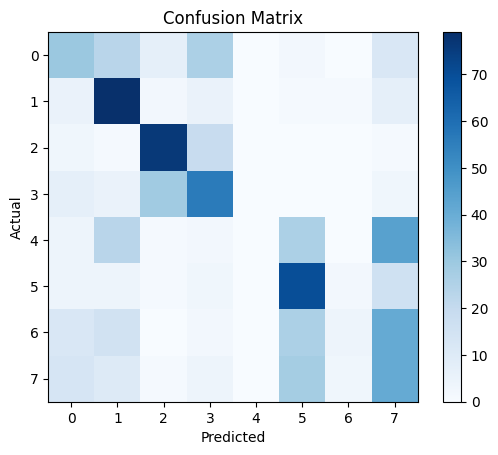

                  precision    recall  f1-score   support

     Anthracnose       0.38      0.30      0.34       100
Bacterial Canker       0.49      0.79      0.61       100
  Cutting Weevil       0.65      0.76      0.70       100
        Die Back       0.48      0.56      0.52       100
      Gall Midge       0.00      0.00      0.00       100
         Healthy       0.46      0.70      0.55       100
  Powdery Mildew       0.40      0.04      0.07       100
     Sooty Mould       0.25      0.41      0.31       100

        accuracy                           0.45       800
       macro avg       0.39      0.45      0.39       800
    weighted avg       0.39      0.45      0.39       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Make predictions with the Decision Tree model (or Random Forest if you are comparing both)
y_pred = dt.predict(X_test)  # This is assuming 'dt' is your Decision Tree model

# Calculate the accuracy, precision, recall, and f1-score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


# plot Decision tree

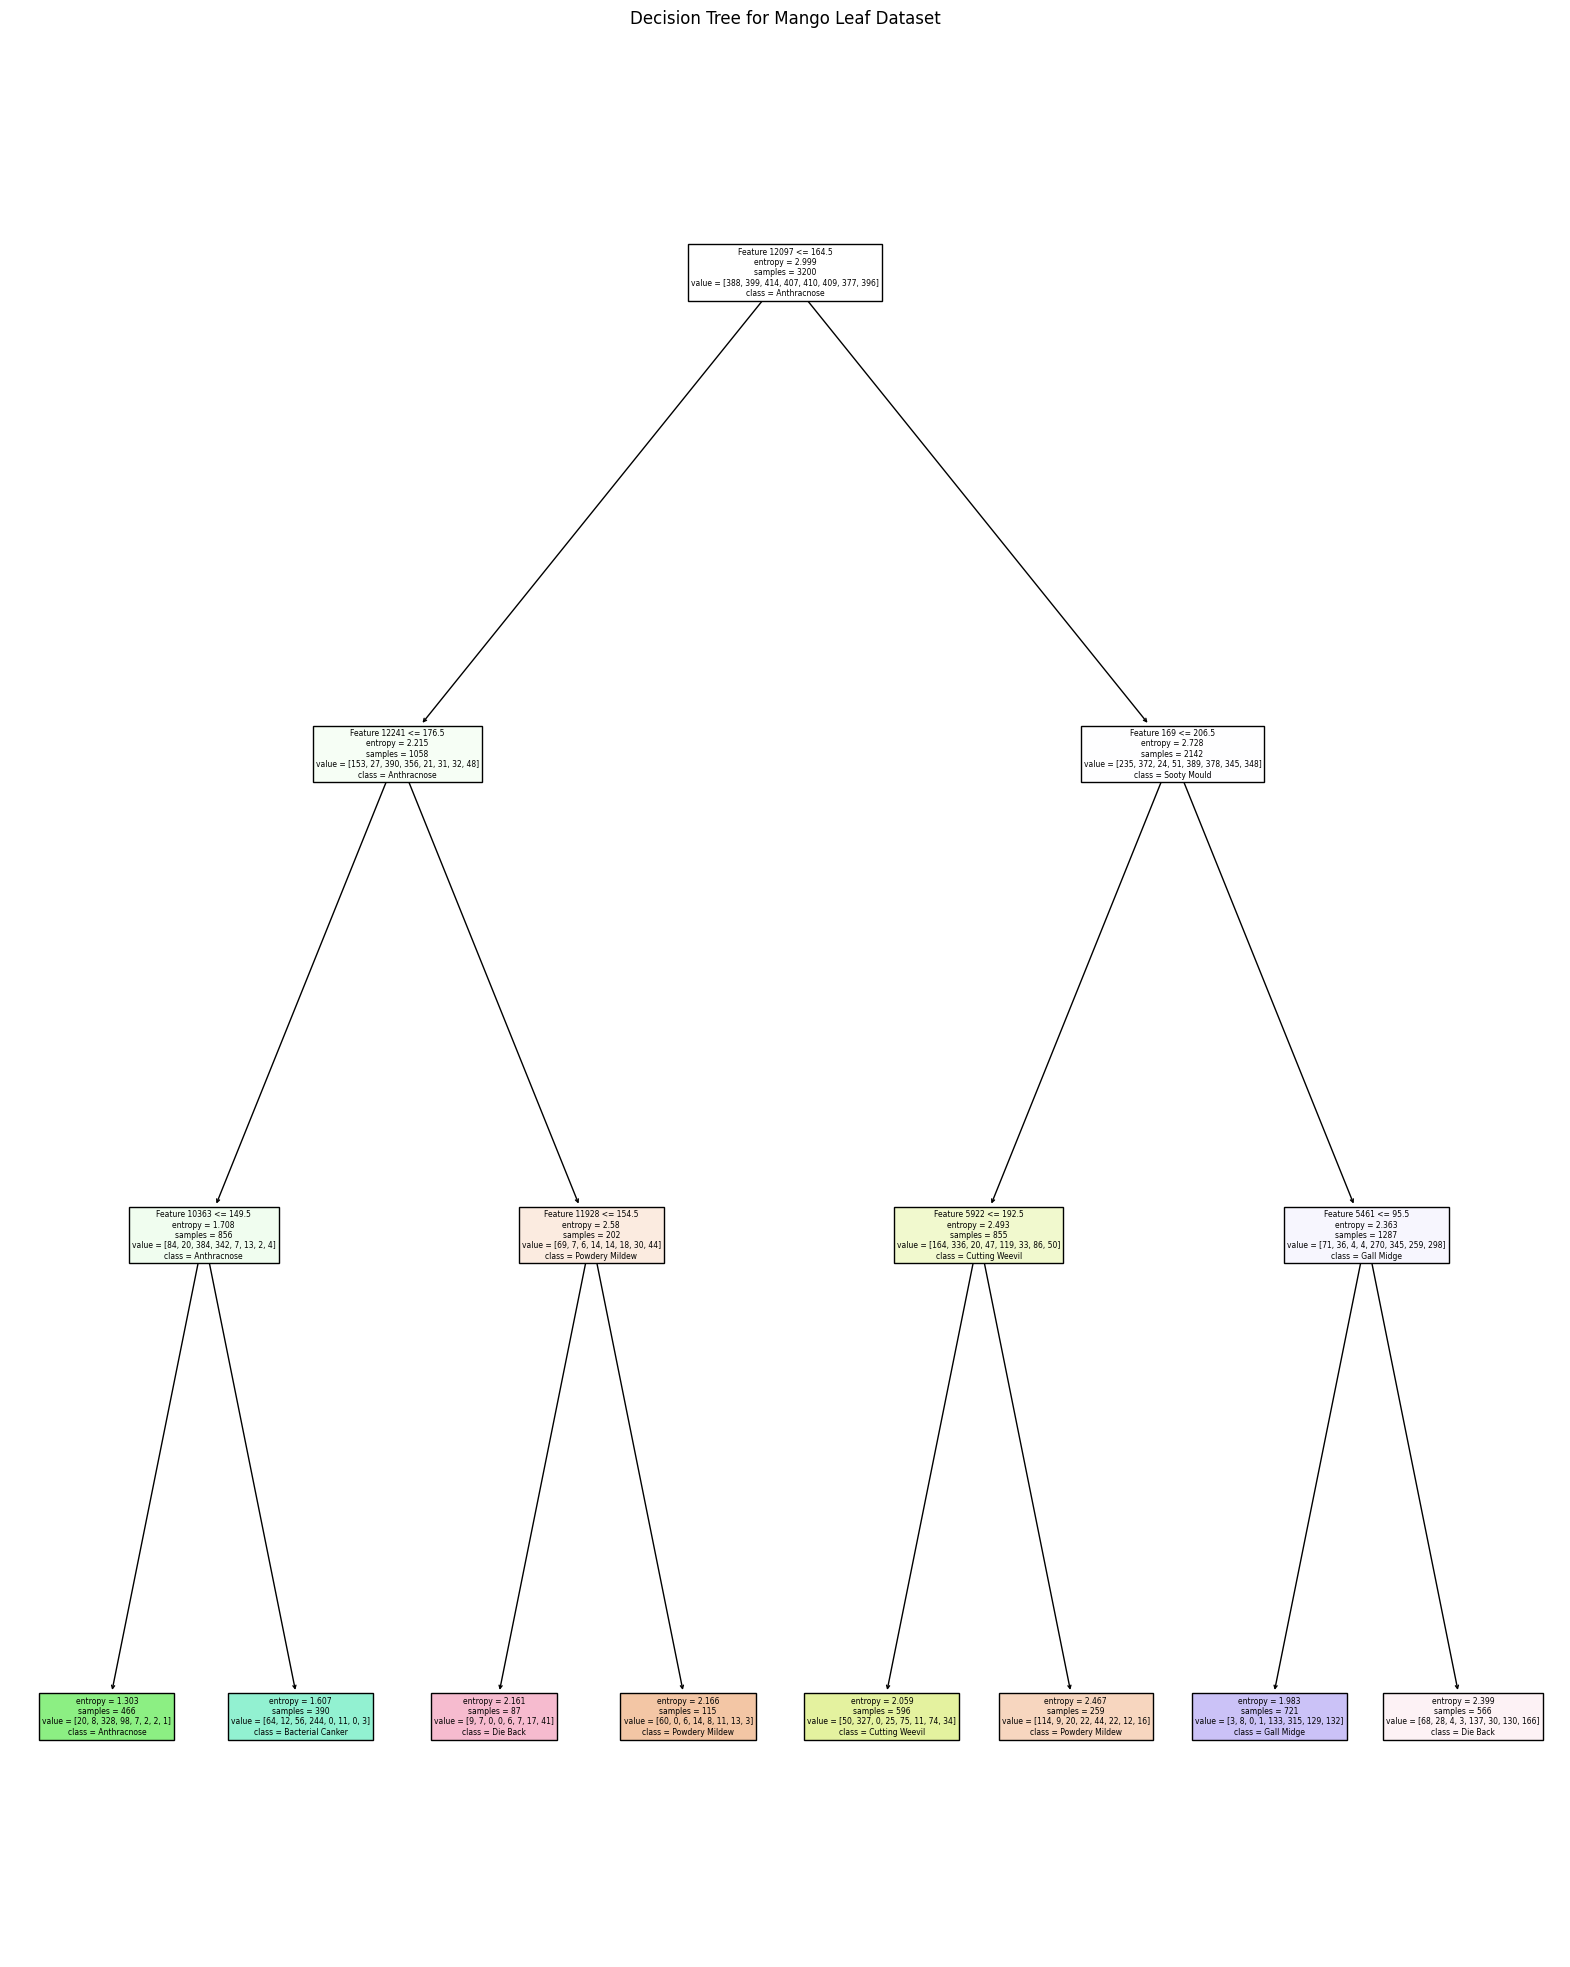

In [17]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming `df` is the DataFrame that contains the Mango Leaf dataset

# Prepare feature matrix (X) and target vector (y)
X = df.drop(columns=['label']).values  # Features (flattened image data)
y = df['label'].values  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Assuming that the labels are numerical, convert them to categorical class names
# Replace 'label' with the corresponding column if necessary
class_names = list(df['label'].unique())  # This will get the unique class names from your 'label' column
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]  # Assuming features are unnamed, this will generate 'Feature 1', 'Feature 2', etc.

# Plot the decision tree
plt.figure(figsize=(20, 25))# 12, 8
plot_tree(dt, feature_names=feature_names, class_names=[str(x) for x in class_names], filled=True)
plt.title('Decision Tree for Mango Leaf Dataset')
plt.show()



#  Random Forest Creation and Training

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.88
                  precision    recall  f1-score   support

     Anthracnose       0.93      0.86      0.89       112
Bacterial Canker       0.86      0.90      0.88       101
  Cutting Weevil       0.99      1.00      0.99        86
        Die Back       0.95      0.96      0.95        93
      Gall Midge       0.70      0.82      0.76        90
         Healthy       0.86      0.87      0.86        91
  Powdery Mildew       0.93      0.80      0.86       123
     Sooty Mould       0.80      0.83      0.82       104

        accuracy                           0.88       800
       macro avg       0.88      0.88      0.88       800
    weighted avg       0.88      0.88      0.88       800

